# Coin problem

In [ ]:
N = 1000000
memory = [-1]*N
def coin_problem(x, coins):
  if x < 0 : return float('inf')
  if x == 0 : return 0
  if memory[x] != - 1 : return memory[x]
  best = float('inf')
  for c in coins :
    best = min(best, coin_problem(x - c, coins) + 1)
  memory[x] = best
  return best

In [ ]:
coin_problem(10, [1, 3, 4])

3

# Longest increasing subsequence

In [ ]:
def lis(array):
  length = []
  for k in range(len(array)):
    length.append(1)
    
    for i in range(k):
      if array[i] < array[k]:
        length[k] = max(length[k], length[i] + 1)
  return max(length)

In [ ]:
def lis(array):
  list_length = []
  list_length.append([-1])
  for i in array:
    menor=True
    mayor=True
    largest_list_length=-1
    largest_end_value_list=-1
    same_length=[]
    for j in range(len(list_length)):
      largest_list_lenght= j if len(list_length[j])>largest_list_length else largest_list_lenght
      if list_length[j][-1] < i and list_length[j][-1] > largest_end_value_list:
        largest_end_value_list=j
        same_length=[]
      if largest_end_value_list!=1 and len(list_length[largest_end_value_list])==len(list_length[j]):
        same_length.append(j)
      largest_end_value_list= j if list_length[j][-1] < i\
                         and list_length[j][-1] > largest_end_value_list else largest_end_value_list
      
      if i>=list_length[j][-1]: menor=False
      if i<=list_length[j][-1]: mayor=False

    if(menor):
      list_length.append([i])
    elif(mayor):
      list_length.append(list_length[largest_list_length].extend(i))
    else:
      list_length.append(list_length[largest_end_value_list].extend(i))
      for q in same_length:
        list_length.remove(q)

  return list_length[max_list(list_length)]

print(lis([0, 8, 4, 12, 2, 10, 6, 14, 1, 9, 5, 13, 3, 11, 7, 15]))

TypeError: ignored

In [ ]:
def max_list(lista):
  max=-1
  for i in range(len(lista)):
    max = i if len(lista[i]) > max else max
  return max

In [ ]:
lis([6,2,5,1,7,4,8,3])

4

# Paths in a grid

In [ ]:
def piag(grid):
  sum = []
  for i in range(len(grid) + 1):
    sum.append([0]*(len(grid) + 1))
  for i in range(1, len(grid) + 1):
    for j in range(1, len(grid) + 1):
      sum[i][j] = max(sum[i][j - 1],  sum[i - 1][j]) + grid[i - 1][j - 1]
  return sum

In [ ]:
grid = [[3,7,9,2,7], [9,8,3,5,5], [1,7,9,8,5], [3,8,6,4,10], [6,3,9,7,8]]
sol = piag(grid)
# Print the path
path_grid = []
for i in range(len(grid)):
  path_grid.append([0]*(len(grid)))
actual = (len(grid) - 1, len(grid) - 1)
path_grid[0][0] = grid[0][0]
while(actual != (0, 0)):
  val = grid[actual[0]][actual[1]]
  path_grid[actual[0]][actual[1]] = val
  sum_val = sol[actual[0] + 1][actual[1] + 1]
  obj = sum_val - val
  if obj == sol[actual[0]][actual[1] + 1]:
    actual = (actual[0] - 1, actual[1])
  else:
    actual = (actual[0], actual[1] - 1)
path_grid

[[3, 0, 0, 0, 0],
 [9, 8, 0, 0, 0],
 [0, 7, 9, 8, 5],
 [0, 0, 0, 0, 10],
 [0, 0, 0, 0, 8]]

# Knapsack

In [ ]:
def knapsack(weights, values, capacity):
  mem = [[0 for c in range(capacity + 1)] for l in range(len(values) + 1)] 
  for i in range(len(values) + 1): 
    for w in range(capacity + 1):
      if i == 0 or w == 0: 
        mem[i][w] = 0
      elif weights[i-1] <= w: 
        mem[i][w] = max(values[i-1] + mem[i-1][w-weights[i-1]], mem[i-1][w]) 
      else:
        mem[i][w] = mem[i-1][w]
  return mem[len(values)][capacity] 

In [ ]:
knapsack([1, 2, 3], [10, 15, 40], 6)

65

# Knapsack animation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
from matplotlib.ticker import MaxNLocator
rc('animation', html='jshtml')

def knapsack(weights, values, capacity):
  anim_background = []
  anim_values = []
  background = np.zeros((len(values) + 1, capacity + 1), np.dtype(np.int32) )
  mem = np.zeros((len(values) + 1, capacity + 1), np.dtype(np.int32) )
  anim_background.append(np.copy(background))
  anim_values.append(np.copy(mem))
  for i in range(len(values) + 1): 
    for w in range(capacity + 1):
      anim_values.append(np.copy(mem))
      background_copy = np.copy(background)
      background_copy[i][w] = 128
      if i == 0 or w == 0: 
        mem[i][w] = 0
      elif weights[i-1] <= w:
        background_copy[i - 1][w - weights[i-1]] = 64
        background_copy[i - 1][w] = 64
        mem[i][w] = max(values[i-1] + mem[i-1][w-weights[i-1]], mem[i-1][w]) 
      else:
        background_copy[i - 1][w] = 64
        mem[i][w] = mem[i-1][w]
      anim_background.append(background_copy)
      anim_background.append(np.copy(background))
      anim_values.append(np.copy(mem))
  return anim_background, anim_values


In [ ]:
iter=0
def generate_animation(count, images, text):
  def updatefig(*args):
    global iter
    iter += 1
    iter %= count
    for txt in ax.texts:
      txt.set_visible(False)
    for i in range(len(text[iter])):
      for j in range(len(text[iter][0])):
          ax.text(j, i, str(text[iter][i][j]), va='center', ha='center')
    im.set_array(images[iter])
    return im,

  fig = plt.figure()
  plt.xlabel('weigths')
  plt.ylabel('values')
  ax = plt.gca()
  ax.invert_yaxis()
  ax.yaxis.set_major_locator(MaxNLocator(integer=True))
  im = plt.imshow(images[0], cmap=plt.cm.Blues, vmin=0, vmax=255, animated=True)
  return animation.FuncAnimation(fig, updatefig, save_count = count, interval = 500)

In [ ]:
background, values = knapsack([1, 2, 3], [10, 15, 40], 6)

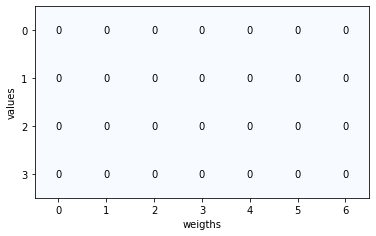

In [ ]:
generate_animation(len(background), background, values)